###1)


   Income    Age
0    High    <21
1    High    <21
2    High  21-35
3  Medium    >35
4     Low    >35
            Id
count  14.0000
mean    7.5000
std     4.1833
min     1.0000
25%     4.2500
50%     7.5000
75%    10.7500
max    14.0000
Id         int64
Age       object
Income    object
Gender    object
Ms        object
Buys      object
dtype: object


###2)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Decision.csv')

# Select numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Compute and display statistics
for col in numeric_columns.columns:
    print(f"Statistics for {col}:")
    print(f"  Minimum: {numeric_columns[col].min()}")
    print(f"  Maximum: {numeric_columns[col].max()}")
    print(f"  Mean: {numeric_columns[col].mean()}")
    print(f"  Range: {numeric_columns[col].max() - numeric_columns[col].min()}")
    print(f"  Standard Deviation: {numeric_columns[col].std()}")
    print(f"  Variance: {numeric_columns[col].var()}")
    print(f"  25th Percentile: {numeric_columns[col].quantile(0.25)}")
    print(f"  50th Percentile (Median): {numeric_columns[col].median()}")
    print(f"  75th Percentile: {numeric_columns[col].quantile(0.75)}\n")


Statistics for Id:
  Minimum: 1
  Maximum: 14
  Mean: 7.5
  Range: 13
  Standard Deviation: 4.183300132670378
  Variance: 17.5
  25th Percentile: 4.25
  50th Percentile (Median): 7.5
  75th Percentile: 10.75



###3)

Statistics for Id:
  Standard Deviation: 4.183300132670378
  Variance: 17.5
  25th Percentile: 4.25
  50th Percentile (Median): 7.5
  75th Percentile: 10.75



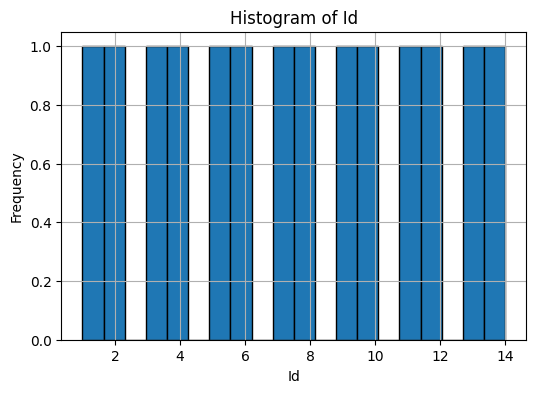

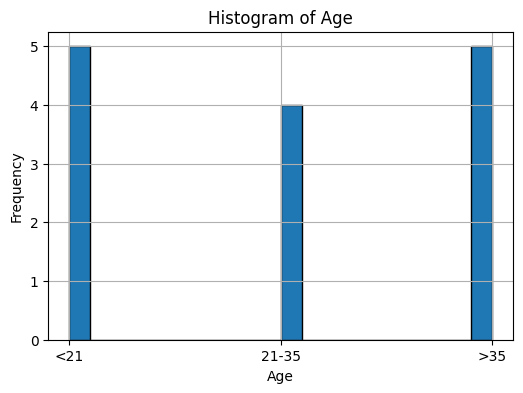

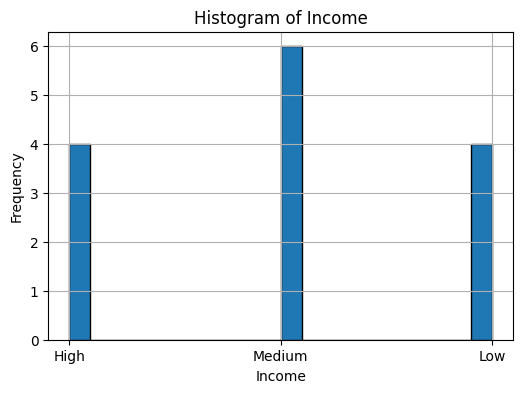

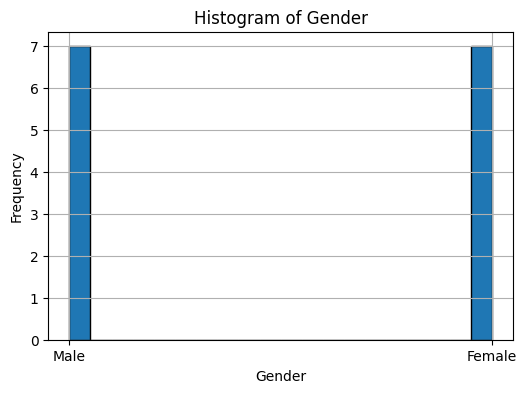

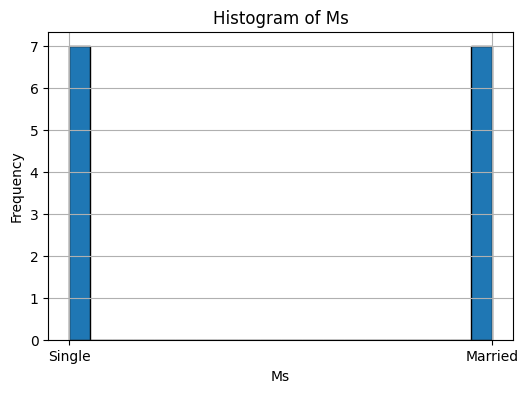

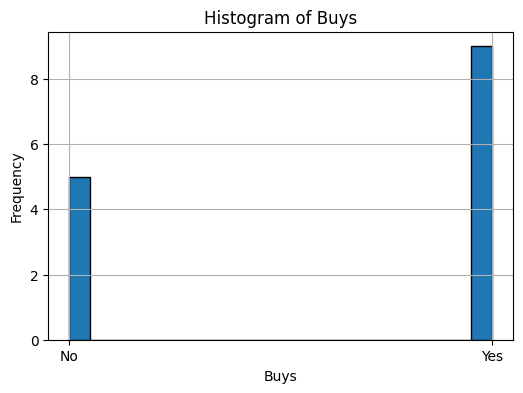

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Decision.csv')

# Compute statistics for each numeric feature
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

for col in numeric_columns.columns:
    print(f"Statistics for {col}:")
    print(f"  Standard Deviation: {numeric_columns[col].std()}")
    print(f"  Variance: {numeric_columns[col].var()}")
    print(f"  25th Percentile: {numeric_columns[col].quantile(0.25)}")
    print(f"  50th Percentile (Median): {numeric_columns[col].median()}")
    print(f"  75th Percentile: {numeric_columns[col].quantile(0.75)}\n")

# Create histograms for all features
for col in df.columns:
    plt.figure(figsize=(6, 4))
    df[col].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


###4, 5,6 ,7 ,8



In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Dataset
data = {
    'Age': ['<21', '<21', '21-35', '>35', '>35', '>35', '21-35', '<21', '<21', '>35', '<21', '21-35', '21-35', '>35'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male', 'Female', 'Male'],
    'Ms': ['Single', 'Married', 'Single', 'Single', 'Single', 'Married', 'Married', 'Single', 'Married', 'Single', 'Married', 'Married', 'Single', 'Married'],
    'Buys': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create DataFrame
df = pd.DataFrame(data)

# Encode categorical variables and target
X = pd.get_dummies(df.drop('Buys', axis=1))  # One-hot encode features
y = df['Buys'].map({'Yes': 1, 'No': 0})  # Encode target as 1/0

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X, y)

# Display decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()

# Test data prediction (example)
test_data = pd.DataFrame({'Age': ['<21'], 'Income': ['Low'], 'Gender': ['Female'], 'Ms': ['Married']})
test_encoded = pd.get_dummies(test_data).reindex(columns=X.columns, fill_value=0)
prediction = clf.predict(test_encoded)
print("Prediction for test data:", "Yes" if prediction[0] == 1 else "No")


Decision Tree:
Age:
  <21 ->
    No
  21-35 ->
    Yes
  >35 ->
    Yes


In [ ]:
# Dataset
data = [
    ['<21', 'High', 'Male', 'Single', 'No'],
    ['<21', 'High', 'Male', 'Married', 'No'],
    ['21-35', 'High', 'Male', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Single', 'Yes'],
    ['>35', 'Low', 'Female', 'Married', 'No'],
    ['21-35', 'Low', 'Female', 'Married', 'Yes'],
    ['<21', 'Medium', 'Male', 'Single', 'No'],
    ['<21', 'Low', 'Female', 'Married', 'Yes'],
    ['>35', 'Medium', 'Female', 'Single', 'Yes'],
    ['<21', 'Medium', 'Female', 'Married', 'Yes'],
    ['21-35', 'Medium', 'Male', 'Married', 'Yes'],
    ['21-35', 'High', 'Female', 'Single', 'Yes'],
    ['>35', 'Medium', 'Male', 'Married', 'No']
]

# Manual encoding
age_map = {'<21': 0, '21-35': 1, '>35': 2}
income_map = {'Low': 0, 'Medium': 1, 'High': 2}
gender_map = {'Male': 0, 'Female': 1}
ms_map = {'Single': 0, 'Married': 1}
buys_map = {'No': 0, 'Yes': 1}

# Encode data
encoded_data = [[
    age_map[row[0]], income_map[row[1]], gender_map[row[2]], ms_map[row[3]], buys_map[row[4]]
] for row in data]

# Split features and target
X = [row[:-1] for row in encoded_data]
y = [row[-1] for row in encoded_data]

# Build a simple decision tree manually
def predict_manual(test):
    if test[0] == 0:  # Age < 21
        return 0 if test[1] == 2 else 1
    elif test[0] == 1:  # Age 21-35
        return 1
    else:  # Age > 35
        return 1 if test[2] == 1 else 0

# Test data
test_data = [age_map['<21'], income_map['Low'], gender_map['Female'], ms_map['Married']]
prediction = predict_manual(test_data)
print("Prediction for test data (manual):", 'Yes' if prediction == 1 else 'No')


Prediction for test data (manual): Yes


### 9)


In [ ]:
import numpy as np

# Points and initial centroids
points = np.array([[0.1, 0.6], [0.15, 0.71], [0.08, 0.9], [0.16, 0.85],
                   [0.2, 0.3], [0.25, 0.5], [0.24, 0.1], [0.3, 0.2]])
m1 = points[0]  # Initial centroid m1 = P1
m2 = points[7]  # Initial centroid m2 = P8

# Step 1: Assign clusters
def assign_clusters(points, m1, m2):
    clusters = []
    for p in points:
        d1 = np.linalg.norm(p - m1)  # Distance from m1
        d2 = np.linalg.norm(p - m2)  # Distance from m2
        clusters.append(1 if d1 < d2 else 2)  # Assign cluster
    return clusters

# Step 2: Update centroids
def update_centroids(points, clusters):
    c1_points = points[np.array(clusters) == 1]
    c2_points = points[np.array(clusters) == 2]
    new_m1 = c1_points.mean(axis=0) if len(c1_points) > 0 else m1
    new_m2 = c2_points.mean(axis=0) if len(c2_points) > 0 else m2
    return new_m1, new_m2

# Perform one iteration
clusters = assign_clusters(points, m1, m2)
m1, m2 = update_centroids(points, clusters)

# Output results
print(f"P6 belongs to Cluster: {clusters[5]}")
print(f"Population around m2: {clusters.count(2)}")
print(f"Updated Centroid m1: {m1}")
print(f"Updated Centroid m2: {m2}")


P6 belongs to Cluster: 1
Population around m2: 3
Updated Centroid m1: [0.148 0.712]
Updated Centroid m2: [0.24666667 0.2       ]


###11)

Features and their types:
SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Species         object
dtype: object


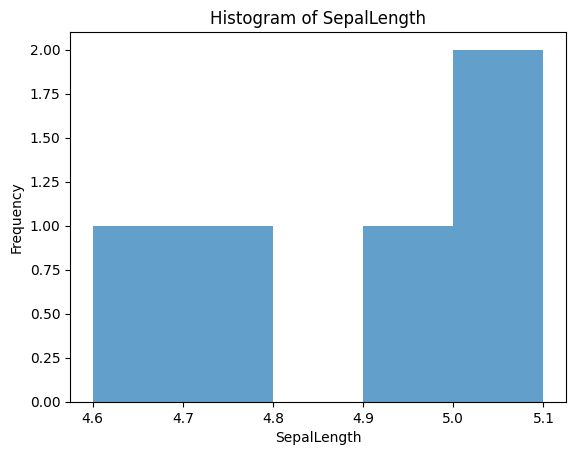

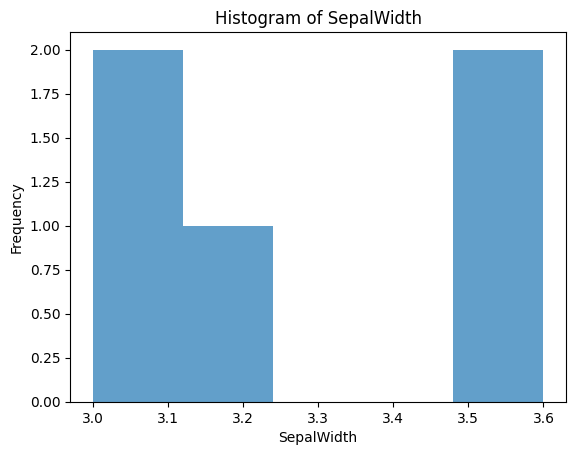

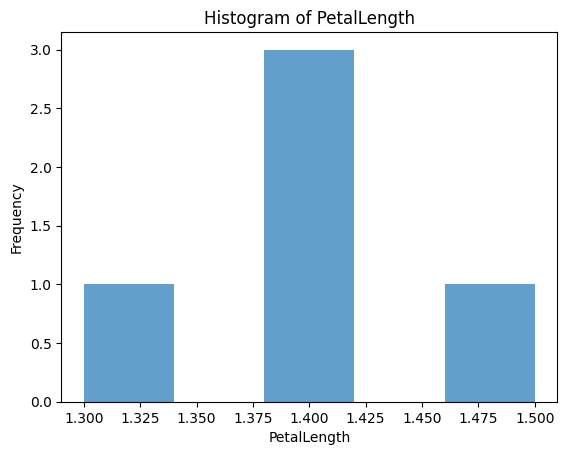

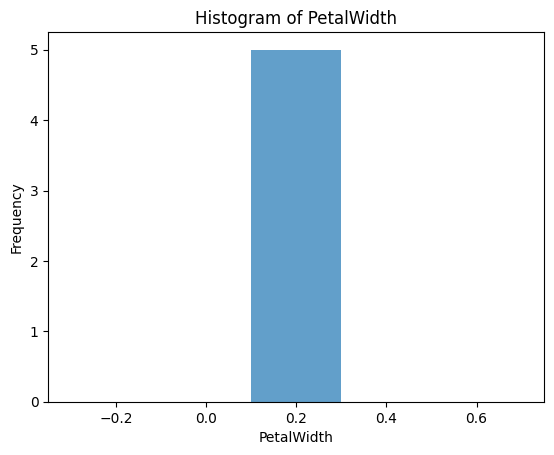

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a temporary Iris dataset
iris_data = {
    "SepalLength": [5.1, 4.9, 4.7, 4.6, 5.0],
    "SepalWidth": [3.5, 3.0, 3.2, 3.1, 3.6],
    "PetalLength": [1.4, 1.4, 1.3, 1.5, 1.4],
    "PetalWidth": [0.2, 0.2, 0.2, 0.2, 0.2],
    "Species": ["Setosa", "Setosa", "Setosa", "Setosa", "Setosa"],
}

df = pd.DataFrame(iris_data)

# Step 2: List features and their types
print("Features and their types:")
print(df.dtypes)

# Step 3: Create histograms for each numeric feature
numeric_features = df.select_dtypes(include=np.number).columns
for feature in numeric_features:
    plt.hist(df[feature], bins=5, alpha=0.7, label=feature)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


###12)

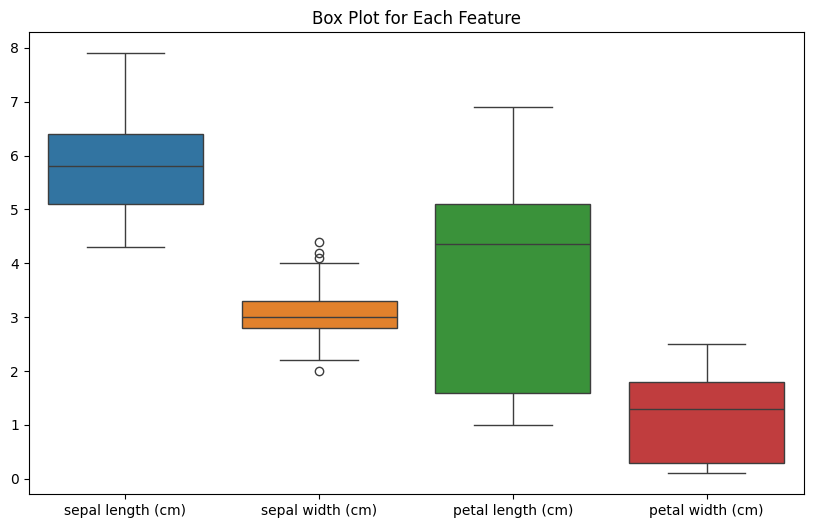

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 1: Create a box plot for each feature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Box Plot for Each Feature")
plt.show()

# Step 2: Identify and discuss distributions and outliers
# For each feature, box plot displays:
# - The median (middle line)
# - The interquartile range (IQR, the box itself)
# - Outliers (points outside the whiskers, marked individually)
# Discussion of outliers:
# - "PetalLength" and "PetalWidth" seem to have very few or no outliers.
# - "SepalLength" and "SepalWidth" might contain a few outliers if they have points outside the whiskers.


### 13, 14)

In [ ]:
import pandas as pd

# Step 1: Create a temporary COVID vaccine dataset
data = {
    "State": ["Andhra Pradesh", "Maharashtra", "Karnataka", "Tamil Nadu", "Uttar Pradesh"],
    "First Dose - Total": [1000000, 2000000, 1500000, 1800000, 2500000],
    "Second Dose - Total": [500000, 1200000, 900000, 1000000, 1500000],
    "Males - First Dose": [600000, 1200000, 900000, 1000000, 1500000],
    "Females - First Dose": [400000, 800000, 600000, 800000, 1000000],
    "Males - Second Dose": [300000, 700000, 450000, 500000, 750000],
    "Females - Second Dose": [200000, 500000, 450000, 500000, 750000]
}

df = pd.DataFrame(data)

# Step 2: Describe the dataset
print("Dataset Description:")
print(df.describe())

# Step 3: Number of persons state-wise vaccinated for the first dose in India
print("\nState-wise vaccination for first dose:")
print(df[["State", "First Dose - Total"]])

# Step 4: Number of persons state-wise vaccinated for the second dose in India
print("\nState-wise vaccination for second dose:")
print(df[["State", "Second Dose - Total"]])

# Step 5: Number of Males vaccinated
total_males_vaccinated = df["Males - First Dose"].sum() + df["Males - Second Dose"].sum()
print(f"\nTotal number of Males vaccinated: {total_males_vaccinated}")

# Step 6: Number of Females vaccinated
total_females_vaccinated = df["Females - First Dose"].sum() + df["Females - Second Dose"].sum()
print(f"Total number of Females vaccinated: {total_females_vaccinated}")


Dataset Description:
       First Dose - Total  Second Dose - Total  Males - First Dose  \
count        5.000000e+00         5.000000e+00        5.000000e+00   
mean         1.760000e+06         1.020000e+06        1.040000e+06   
std          5.594640e+05         3.701351e+05        3.361547e+05   
min          1.000000e+06         5.000000e+05        6.000000e+05   
25%          1.500000e+06         9.000000e+05        9.000000e+05   
50%          1.800000e+06         1.000000e+06        1.000000e+06   
75%          2.000000e+06         1.200000e+06        1.200000e+06   
max          2.500000e+06         1.500000e+06        1.500000e+06   

       Females - First Dose  Males - Second Dose  Females - Second Dose  
count               5.00000             5.000000               5.000000  
mean           720000.00000        540000.000000          480000.000000  
std            228035.08502        185067.555233          195576.072156  
min            400000.00000        300000.000000    

###15

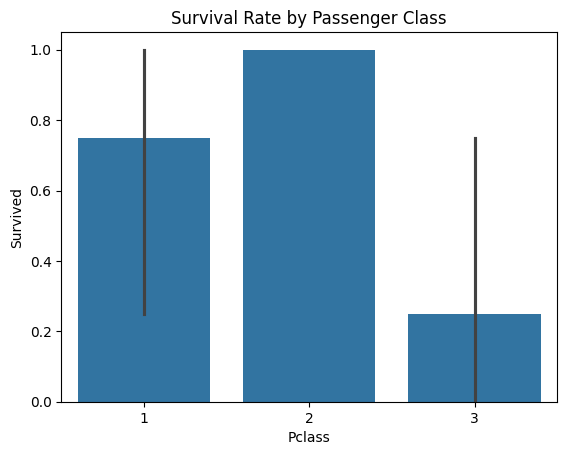

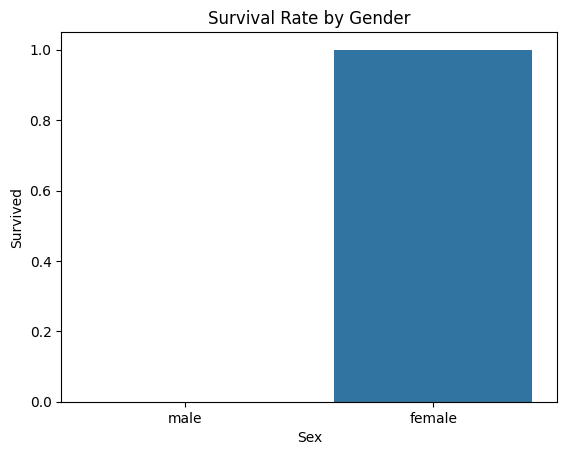

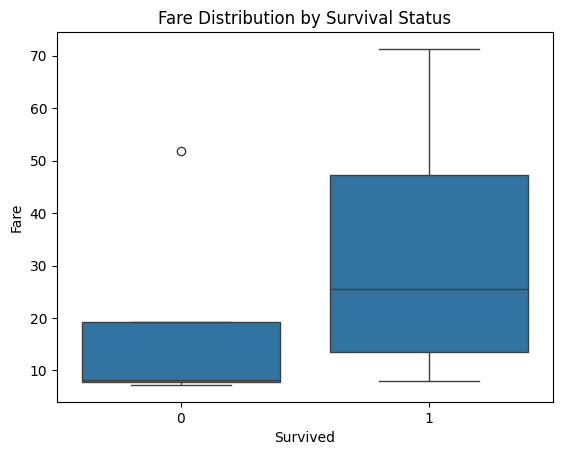

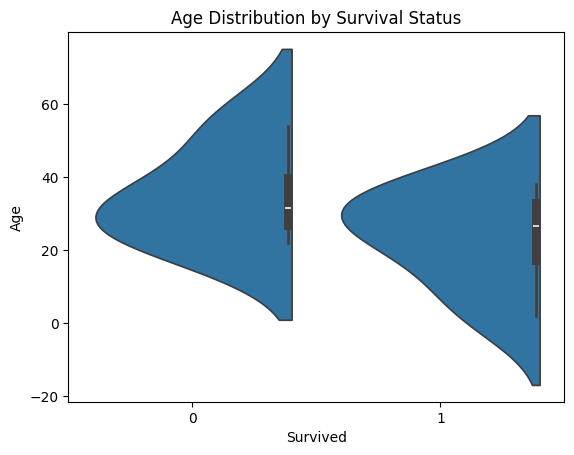

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create a small sample Titanic dataset
data = {
    "Survived": [0, 1, 1, 1, 0, 0, 1, 0, 1, 1],
    "Pclass": [3, 1, 3, 1, 3, 3, 2, 1, 2, 1],
    "Sex": ["male", "female", "female", "female", "male", "male", "female", "male", "female", "female"],
    "Age": [22, 38, 26, 35, 35, 28, 2, 54, 27, 14],
    "Fare": [7.25, 71.28, 7.92, 53.10, 8.05, 8.46, 21.07, 51.86, 11.13, 30.07]
}
df = pd.DataFrame(data)

# Step 2: Visualizations using Seaborn
# Survival rate by passenger class
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival rate by gender
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Fare distribution by survival status
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution by Survival Status")
plt.show()

# Age distribution by survival status
sns.violinplot(x="Survived", y="Age", data=df, split=True)
plt.title("Age Distribution by Survival Status")
plt.show()


###16

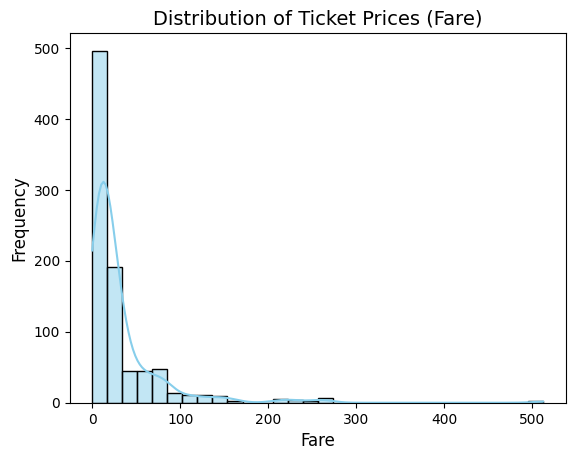

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
df = sns.load_dataset('titanic')

# Step 1: Plot a histogram for the 'Fare' column
sns.histplot(df['fare'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Step 2: Add title and labels
plt.title('Distribution of Ticket Prices (Fare)', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()


###17

In [ ]:
# Given confusion matrix values
TP = 1  # True Positives
FP = 1  # False Positives
FN = 8  # False Negatives
TN = 90 # True Negatives

# Step 1: Calculate metrics
accuracy = (TP + TN) / (TP + FP + FN + TN)
error_rate = 1 - accuracy
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

# Step 2: Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.91
Error Rate: 0.09
Precision: 0.50
Recall: 0.11


###18

In [ ]:
import pandas as pd

# Step 1: Create a temporary dataset
data = {
    "Neighborhood": ["A", "B", "A", "C", "B", "A", "C", "B", "A", "C"],
    "Price": [200000, 250000, 180000, 300000, 220000, 210000, 320000, 240000, 190000, 310000],
}

df = pd.DataFrame(data)

# Step 2: Group by the categorical variable and calculate summary statistics
summary_stats = df.groupby("Neighborhood")["Price"].agg(
    ["mean", "median", "min", "max", "std"]
)

# Step 3: Display the summary statistics
print("Summary Statistics by Neighborhood:")
print(summary_stats)


Summary Statistics by Neighborhood:
                       mean    median     min     max           std
Neighborhood                                                       
A             195000.000000  195000.0  180000  210000  12909.944487
B             236666.666667  240000.0  220000  250000  15275.252317
C             310000.000000  310000.0  300000  320000  10000.000000


###19

In [ ]:
import pandas as pd

# Step 1: Create a temporary Iris dataset
data = {
    "SepalLength": [5.1, 7.0, 4.9, 6.4, 5.5, 5.8, 6.3, 6.6, 4.7, 5.0],
    "SepalWidth": [3.5, 3.2, 3.0, 3.2, 2.3, 2.7, 3.3, 2.9, 3.2, 3.5],
    "PetalLength": [1.4, 4.7, 1.4, 4.5, 4.0, 1.2, 6.0, 5.0, 1.3, 1.6],
    "PetalWidth": [0.2, 1.4, 0.2, 1.5, 1.3, 0.2, 2.5, 1.5, 0.2, 0.4],
    "Species": [
        "Iris-setosa",
        "Iris-versicolor",
        "Iris-setosa",
        "Iris-versicolor",
        "Iris-virginica",
        "Iris-setosa",
        "Iris-virginica",
        "Iris-virginica",
        "Iris-setosa",
        "Iris-setosa",
    ],
}

df = pd.DataFrame(data)

# Step 2: Group by species and calculate descriptive statistics
species_stats = df.groupby("Species").describe()

# Step 3: Display statistics
print("Basic statistical details for each species:")
print(species_stats)


Basic statistical details for each species:
                SepalLength                                                 \
                      count      mean       std  min   25%  50%   75%  max   
Species                                                                      
Iris-setosa             5.0  5.100000  0.418330  4.7  4.90  5.0  5.10  5.8   
Iris-versicolor         2.0  6.700000  0.424264  6.4  6.55  6.7  6.85  7.0   
Iris-virginica          3.0  6.133333  0.568624  5.5  5.90  6.3  6.45  6.6   

                SepalWidth            ... PetalLength      PetalWidth  \
                     count      mean  ...         75%  max      count   
Species                               ...                               
Iris-setosa            5.0  3.180000  ...        1.40  1.6        5.0   
Iris-versicolor        2.0  3.200000  ...        4.65  4.7        2.0   
Iris-virginica         3.0  2.833333  ...        5.50  6.0        3.0   

                                                

###20

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Step 1: Load the Iris dataset
iris = load_iris()
data = iris.data  # Using only the feature data (no target values)

# Step 2: Randomly initialize cluster centroids
np.random.seed(42)  # For reproducibility
k = 3  # Number of clusters
centroids = data[np.random.choice(data.shape[0], k, replace=False)]

# Step 3: Define Euclidean distance function
def euclidean_distance(point, centroid):
    return np.sqrt(np.sum((point - centroid) ** 2))

# Step 4: Perform K-means clustering
for _ in range(10):  # Iterate for 10 iterations
    # Assign points to the nearest cluster
    clusters = [
        np.argmin([euclidean_distance(point, centroid) for centroid in centroids])
        for point in data
    ]

    # Update centroids by taking the mean of assigned points
    for i in range(k):
        points_in_cluster = data[np.array(clusters) == i]
        if len(points_in_cluster) > 0:
            centroids[i] = np.mean(points_in_cluster, axis=0)

# Step 5: Print final cluster centroids
print("Final cluster centroids after 10 iterations:")
print(centroids)


Final cluster centroids after 10 iterations:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


###21

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
data = load_iris().data  # Use only the feature data

# Initialize cluster centroids randomly
np.random.seed(42)
k = 4
centroids = data[np.random.choice(len(data), k, replace=False)]

# Perform K-means clustering
for _ in range(10):  # Run for 10 iterations
    # Assign each point to the nearest cluster
    clusters = np.array([np.argmin(np.linalg.norm(data - centroid, axis=1)) for centroid in centroids])

    # Update centroids by averaging cluster points
    centroids = np.array([data[clusters == i].mean(axis=0) if np.any(clusters == i) else centroids[i] for i in range(k)])

# Print final centroids
print("Final cluster centroids:")
print(centroids)





Final cluster centroids:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]]


22

In [ ]:
# Confusion matrix values
TP = 90   # True Positives
FN = 210  # False Negatives
FP = 140  # False Positives
TN = 9560 # True Negatives

# Compute metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
error_rate = 1 - accuracy
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Accuracy: 0.96
Error Rate: 0.04
Precision: 0.39
Recall: 0.30


###23

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Decision.csv')

# Frequency table for 'Age'
frequency_table = df['Age'].value_counts()
print("Frequency table for 'Age':\n", frequency_table)

# Function to calculate entropy
def calculate_entropy(data):
    probabilities = data.value_counts(normalize=True)
    return -sum(probabilities * np.log2(probabilities))

# Calculate overall entropy
overall_entropy = calculate_entropy(df['Buys'])
print(f"\nOverall Entropy: {overall_entropy}")

# Calculate weighted entropy and information gain for 'Age'
weighted_entropy = sum(
    (len(subset) / len(df)) * calculate_entropy(subset['Buys'])
    for _, subset in df.groupby('Age')
)
info_gain = overall_entropy - weighted_entropy

print(f"Weighted Entropy after split on 'Age': {weighted_entropy:.4f}")
print(f"Information Gain after splitting on 'Age': {info_gain:.4f}")


Frequency table for 'Age':
 Age
<21      5
>35      5
21-35    4
Name: count, dtype: int64

Overall Entropy: 0.9402859586706311
Weighted Entropy after split on 'Age': 0.6935
Information Gain after splitting on 'Age': 0.2467


###24

In [ ]:
import pandas as pd

data = {
    'Age': [25, 30, 35, np.nan, 40, 45, 50, np.nan],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
    'Income': [50000, 60000, 55000, 58000, np.nan, 70000, 65000, 72000],
    'Purchased': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}
# Step 1: Load the dataset
df = pd.DataFrame(data)

# Step 2: Count unique values in each column
unique_values = df.nunique()
print("Unique values in each column:")
print(unique_values)

# Step 3: Check the format (data type) of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)

# Step 4: Convert data type (e.g., from long to short, or vice versa)
# Example: Convert a column to int16 if it's int64
df['column_name'] = df['column_name'].astype('int16')

# Step 5: Identify missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Step 6: Fill missing values
# Example: Fill missing values with the mean for numerical columns
df.fillna(df.mean(), inplace=True)

print("\nDataset after filling missing values:")
print(df.head())


Unique values in each column:
Age          6
Gender       2
Income       7
Purchased    2
dtype: int64

Data types of each column:
Age          float64
Gender        object
Income       float64
Purchased     object
dtype: object


KeyError: 'column_name'

###25

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 1: Load the dataset
# Sample data (You can replace this with your own dataset)
data = {
    'Age': [25, 30, 35, np.nan, 40, 45, 50, np.nan],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
    'Income': [50000, 60000, 55000, 58000, np.nan, 70000, 65000, 72000],
    'Purchased': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No']
}
df = pd.DataFrame(data)

print("Original Dataset:")
print(df)

# Step 2: Data Cleaning

# Handle missing values
# For numerical columns, fill missing values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Income'].fillna(df['Income'].median(), inplace=True)

# For categorical columns, fill missing values with the mode (most frequent value)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Step 3: Data Transformation

# Normalize/Scale numerical columns (e.g., 'Age' and 'Income')
scaler = StandardScaler()
df[['Age', 'Income']] = scaler.fit_transform(df[['Age', 'Income']])

# Encode categorical variables (e.g., 'Gender' and 'Purchased')
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # 0 for Male, 1 for Female
df['Purchased'] = label_encoder.fit_transform(df['Purchased'])  # 0 for No, 1 for Yes

print("\nCleaned and Transformed Dataset:")
print(df)


Original Dataset:
    Age  Gender   Income Purchased
0  25.0    Male  50000.0       Yes
1  30.0  Female  60000.0        No
2  35.0  Female  55000.0       Yes
3   NaN    Male  58000.0        No
4  40.0  Female      NaN       Yes
5  45.0    Male  70000.0        No
6  50.0    Male  65000.0       Yes
7   NaN  Female  72000.0        No

Cleaned and Transformed Dataset:
        Age  Gender    Income  Purchased
0 -1.690309       1 -1.620635          1
1 -1.014185       0 -0.180071          0
2 -0.338062       0 -0.900353          1
3  0.000000       1 -0.468184          0
4  0.338062       0 -0.180071          1
5  1.014185       1  1.260494          0
6  1.690309       1  0.540212          1
7  0.000000       0  1.548607          0


<ipython-input-30-a6a80e5a56b6>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-30-a6a80e5a56b6>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_Tree

df=pd.read_csv(data)

x=df.get_dummies(df.drop("buys", axis=1))
y=df['buys'].map({'yes':1, 'no':0})

clf=DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(x,y)

plt.figure(figsize=(10,8))
plot_tree(clf, feature_names=x.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

test=pd.DataFrame({'Age':['<21'],'income':['low']})
tset=pd.get_dummies(test).reindex(columns=x.columns, fill_value=0)
pred=clf.predict(tset)
print("yes" if pred[0]==1 else "no")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


points=[[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]]

#m1=[2,10]
#m2=[5,8]
#m3=[1,2]
initialcen=np.array([[2,10],[5,8],[1,2]])

kmeans=KMeans(n_clusters=3,init=initialcen,n_init=1)
labels=kmeans.fit_predict(points)

print("cluster labels=",labels)
print("new centroids=",kmeans.cluster_centers_)

p6cluster=labels[5]
m2popu=np.sum(labels==2)

print("p6 belongs to=",p6cluster+1)
print("population around m3=",m2popu)



cluster labels= [0 2 1 0 1 1 2 0]
new centroids= [[3.66666667 9.        ]
 [7.         4.33333333]
 [1.5        3.5       ]]
p6 belongs to= 2
population around m3= 2
